In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date, datetime, timedelta
import pickle
import plotly.offline as py
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
#import cufflinks as cf
import seaborn as sns

## For 5 minutes Assumption

In [3]:
data = pd.read_csv("turbine&weather_combined_5mins.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Columns: 124 entries, kW_Turbine1 to weather_day_of_week
dtypes: float64(101), int64(9), object(14)
memory usage: 2.5+ MB


In [5]:
for c in data.columns:
    print(c)

kW_Turbine1
kW_Turbine2
kW_Turbine3
kW_Turbine4
kW_Turbine5
kW_Turbine6
kW_Turbine7
kW_Turbine8
kW_Turbine9
kW_Turbine10
kW_Turbine11
kW_Turbine12
kW_Turbine13
kW_Turbine14
kW_Turbine15
kW_Turbine16
kW_Turbine17
kW_Turbine18
kW_Turbine19
kW_Turbine20
kW_Turbine21
kW_Turbine22
kW_Turbine23
kW_Turbine24
kW_Turbine25
kW_Turbine26
kW_Turbine27
kW_Turbine28
kW_Turbine29
kW_Turbine30
kW_Turbine31
kW_Turbine32
kW_Turbine33
kW_Turbine34
kW_Turbine35
kW_Turbine36
kW_Turbine37
kW_Turbine38
kW_Turbine39
kW_Turbine40
kW_Turbine41
kW_Turbine42
kW_Turbine43
kW_Turbine44
kW_Turbine45
kW_Turbine46
kW_Turbine47
kW_Turbine48
kW_Turbine49
kW_Turbine50
kW_Turbine51
kW_Turbine52
kW_Turbine53
kW_Turbine54
kW_Turbine55
kW_Turbine56
kW_Turbine57
kW_Turbine58
kW_Turbine59
kW_Turbine60
kW_Turbine61
kW_Turbine62
kW_Turbine63
kW_Turbine64
kW_Turbine65
kW_Turbine66
kW_Turbine67
kW_Turbine68
kW_Turbine69
kW_Turbine70
kW_Turbine71
kW_Turbine72
kW_Turbine73
kW_Turbine74
kW_Turbine75
kW_Turbine76
kW_Turbine77
kW_Turbi

In [6]:
data = data[['timestamp', 'avg_kW_reading', 'wspd']]

In [7]:
data.shape

(2600, 3)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
timestamp         2600 non-null object
avg_kW_reading    2600 non-null float64
wspd              2596 non-null float64
dtypes: float64(2), object(1)
memory usage: 61.0+ KB


In [9]:
data = data.dropna(subset = ['wspd'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2596 entries, 0 to 2599
Data columns (total 3 columns):
timestamp         2596 non-null object
avg_kW_reading    2596 non-null float64
wspd              2596 non-null float64
dtypes: float64(2), object(1)
memory usage: 81.1+ KB


In [11]:
def df_derived_by_shift(df,lag=0,NON_DER=[]):
    df = df.copy()
    if not lag:
        return df
    cols ={}
    for i in range(1,lag+1):
        for x in list(df.columns):
            if x not in NON_DER:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = 1
        for c in columns:
            dfn[c] = df[k].shift(periods=i)
            i+=1
        df = pd.concat([df, dfn], axis=1, join_axes=[df.index])
    return df

## Lagging windspeed

In [12]:
NON_DER = ['timestamp','avg_kW_reading']
df_new = df_derived_by_shift(data, 500, NON_DER)

In [13]:
df_new

,timestamp,avg_kW_reading,wspd,wspd_1,wspd_2,wspd_3,wspd_4,wspd_5,wspd_6,wspd_7,...,wspd_491,wspd_492,wspd_493,wspd_494,wspd_495,wspd_496,wspd_497,wspd_498,wspd_499,wspd_500
0,2016-01-01 00:00:00,378.589667,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01 00:05:00,324.420111,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01 00:10:00,350.998667,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01 00:15:00,302.126000,7.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01 00:20:00,320.931889,7.0,7.0,8.0,8.0,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2016-01-01 00:25:00,383.948111,7.0,7.0,7.0,8.0,8.0,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2016-01-01 00:30:00,622.666000,7.0,7.0,7.0,7.0,8.0,8.0,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2016-01-01 00:35:00,889.557444,6.0,7.0,7.0,7.0,7.0,8.0,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2016-01-01 00:40:00,952.638556,6.0,6.0,7.0,7.0,7.0,7.0,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2016-01-01 00:45:00,1063.391111,6.0,6.0,6.0,7.0,7.0,7.0,7.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
res = df_new.corr()
res

,avg_kW_reading,wspd,wspd_1,wspd_2,wspd_3,wspd_4,wspd_5,wspd_6,wspd_7,wspd_8,...,wspd_491,wspd_492,wspd_493,wspd_494,wspd_495,wspd_496,wspd_497,wspd_498,wspd_499,wspd_500
avg_kW_reading,1.000000,-0.084816,-0.085683,-0.086790,-0.089086,-0.091952,-0.095688,-0.099905,-0.103505,-0.106886,...,-0.051285,-0.053002,-0.055954,-0.059112,-0.061878,-0.064001,-0.066459,-0.069111,-0.071800,-0.075335
wspd,-0.084816,1.000000,0.961097,0.922179,0.883246,0.844305,0.822900,0.801561,0.780219,0.758890,...,0.022627,0.020741,0.018048,0.014986,0.011920,0.008799,0.007784,0.006706,0.005628,0.004533
wspd_1,-0.085683,0.961097,1.000000,0.961082,0.922150,0.883203,0.844248,0.822905,0.801561,0.780214,...,0.024474,0.022589,0.020703,0.017642,0.014579,0.011512,0.008389,0.007312,0.006233,0.005155
wspd_2,-0.086790,0.922179,0.961082,1.000000,0.961068,0.922122,0.883160,0.844258,0.822911,0.801561,...,0.026321,0.024437,0.022551,0.020298,0.017236,0.014171,0.011103,0.007917,0.006839,0.005760
wspd_3,-0.089086,0.883246,0.922150,0.961068,1.000000,0.961054,0.922093,0.883179,0.844268,0.822916,...,0.028166,0.026283,0.024399,0.022147,0.019892,0.016829,0.013763,0.010632,0.007444,0.006365
wspd_4,-0.091952,0.844305,0.883203,0.922122,0.961054,1.000000,0.961039,0.922121,0.883199,0.844278,...,0.029375,0.028129,0.026246,0.023995,0.021742,0.019486,0.016422,0.013293,0.010160,0.006970
wspd_5,-0.095688,0.822900,0.844248,0.883160,0.922093,0.961039,1.000000,0.961077,0.922149,0.883218,...,0.030643,0.029338,0.028092,0.025842,0.023590,0.021336,0.019079,0.015952,0.012822,0.009687
wspd_6,-0.099905,0.801561,0.822905,0.844258,0.883179,0.922121,0.961077,1.000000,0.961073,0.922142,...,0.031931,0.030627,0.029322,0.027926,0.025675,0.023423,0.021168,0.018886,0.015758,0.012627
wspd_7,-0.103505,0.780219,0.801561,0.822911,0.844268,0.883199,0.922149,0.961073,1.000000,0.961069,...,0.033220,0.031915,0.030610,0.029155,0.027759,0.025508,0.023255,0.020975,0.018693,0.015564
wspd_8,-0.106886,0.758890,0.780214,0.801561,0.822916,0.844278,0.883218,0.922142,0.961069,1.000000,...,0.028290,0.033203,0.031898,0.030444,0.028989,0.027592,0.025341,0.023063,0.020782,0.018499


In [15]:
res.shape

(502, 502)

In [16]:
coefficients = res[1:]['avg_kW_reading']
coefficients

wspd       -0.084816
wspd_1     -0.085683
wspd_2     -0.086790
wspd_3     -0.089086
wspd_4     -0.091952
wspd_5     -0.095688
wspd_6     -0.099905
wspd_7     -0.103505
wspd_8     -0.106886
wspd_9     -0.110891
wspd_10    -0.115897
wspd_11    -0.120390
wspd_12    -0.125098
wspd_13    -0.128911
wspd_14    -0.132970
wspd_15    -0.137854
wspd_16    -0.141863
wspd_17    -0.144316
wspd_18    -0.145541
wspd_19    -0.145979
wspd_20    -0.146134
wspd_21    -0.146149
wspd_22    -0.145315
wspd_23    -0.144125
wspd_24    -0.143412
wspd_25    -0.143706
wspd_26    -0.143953
wspd_27    -0.143313
wspd_28    -0.142459
wspd_29    -0.140922
              ...   
wspd_471   -0.069527
wspd_472   -0.066905
wspd_473   -0.064727
wspd_474   -0.062913
wspd_475   -0.060673
wspd_476   -0.058584
wspd_477   -0.056589
wspd_478   -0.054248
wspd_479   -0.052879
wspd_480   -0.052129
wspd_481   -0.051319
wspd_482   -0.051181
wspd_483   -0.051200
wspd_484   -0.051450
wspd_485   -0.052138
wspd_486   -0.052383
wspd_487   -0

In [17]:
lag = np.arange(0,501)

In [18]:
lag

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

Text(0, 0.5, 'Pearson_corr_coef')

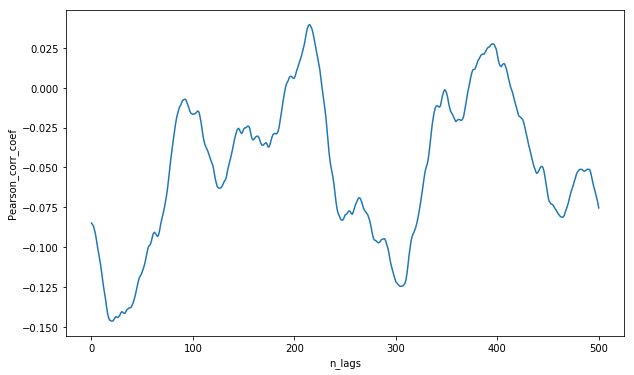

In [19]:
plt.figure(figsize=(10,6))
plt.plot(lag, coefficients)
plt.xlabel('n_lags')
plt.ylabel('Pearson_corr_coef')

In [20]:
np.corrcoef(data['avg_kW_reading'],data['wspd'])

array([[ 1.        , -0.08481577],
       [-0.08481577,  1.        ]])

## Lagging avg_kW_reading

In [21]:
NON_DER = ['timestamp','wspd']
df_new = df_derived_by_shift(data, 500, NON_DER)

In [22]:
df_new

,timestamp,avg_kW_reading,wspd,avg_kW_reading_1,avg_kW_reading_2,avg_kW_reading_3,avg_kW_reading_4,avg_kW_reading_5,avg_kW_reading_6,avg_kW_reading_7,...,avg_kW_reading_491,avg_kW_reading_492,avg_kW_reading_493,avg_kW_reading_494,avg_kW_reading_495,avg_kW_reading_496,avg_kW_reading_497,avg_kW_reading_498,avg_kW_reading_499,avg_kW_reading_500
0,2016-01-01 00:00:00,378.589667,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01 00:05:00,324.420111,8.0,378.589667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01 00:10:00,350.998667,8.0,324.420111,378.589667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01 00:15:00,302.126000,7.0,350.998667,324.420111,378.589667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01 00:20:00,320.931889,7.0,302.126000,350.998667,324.420111,378.589667,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2016-01-01 00:25:00,383.948111,7.0,320.931889,302.126000,350.998667,324.420111,378.589667,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2016-01-01 00:30:00,622.666000,7.0,383.948111,320.931889,302.126000,350.998667,324.420111,378.589667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2016-01-01 00:35:00,889.557444,6.0,622.666000,383.948111,320.931889,302.126000,350.998667,324.420111,378.589667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2016-01-01 00:40:00,952.638556,6.0,889.557444,622.666000,383.948111,320.931889,302.126000,350.998667,324.420111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2016-01-01 00:45:00,1063.391111,6.0,952.638556,889.557444,622.666000,383.948111,320.931889,302.126000,350.998667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
res = df_new.corr()
res

,avg_kW_reading,wspd,avg_kW_reading_1,avg_kW_reading_2,avg_kW_reading_3,avg_kW_reading_4,avg_kW_reading_5,avg_kW_reading_6,avg_kW_reading_7,avg_kW_reading_8,...,avg_kW_reading_491,avg_kW_reading_492,avg_kW_reading_493,avg_kW_reading_494,avg_kW_reading_495,avg_kW_reading_496,avg_kW_reading_497,avg_kW_reading_498,avg_kW_reading_499,avg_kW_reading_500
avg_kW_reading,1.000000,-0.084816,0.988931,0.968703,0.948120,0.928749,0.910246,0.891907,0.873997,0.857628,...,-0.297459,-0.299244,-0.300749,-0.301886,-0.303609,-0.305736,-0.306834,-0.306571,-0.305712,-0.305629
wspd,-0.084816,1.000000,-0.083606,-0.082526,-0.080506,-0.078906,-0.077383,-0.075690,-0.074263,-0.073236,...,-0.179770,-0.182590,-0.185110,-0.187184,-0.189315,-0.191369,-0.193879,-0.197482,-0.200826,-0.202364
avg_kW_reading_1,0.988931,-0.083606,1.000000,0.988924,0.968682,0.948085,0.928699,0.910183,0.891831,0.873908,...,-0.295892,-0.297369,-0.299124,-0.300585,-0.301673,-0.303366,-0.305446,-0.306482,-0.306170,-0.305226
avg_kW_reading_2,0.968703,-0.082526,0.988924,1.000000,0.988916,0.968660,0.948048,0.928647,0.910118,0.891752,...,-0.295741,-0.295802,-0.297248,-0.298957,-0.300368,-0.301425,-0.303068,-0.305084,-0.306070,-0.305669
avg_kW_reading_3,0.948120,-0.080506,0.968682,0.988916,1.000000,0.988908,0.968637,0.948009,0.928595,0.910052,...,-0.296349,-0.295652,-0.295681,-0.297080,-0.298739,-0.300117,-0.301124,-0.302702,-0.304667,-0.305564
avg_kW_reading_4,0.928749,-0.078906,0.948085,0.968660,0.988908,1.000000,0.988900,0.968614,0.947971,0.928542,...,-0.296660,-0.296260,-0.295531,-0.295511,-0.296859,-0.298486,-0.299814,-0.300755,-0.302281,-0.304157
avg_kW_reading_5,0.910246,-0.077383,0.928699,0.948048,0.968637,0.988900,1.000000,0.988892,0.968591,0.947932,...,-0.296138,-0.296572,-0.296139,-0.295361,-0.295290,-0.296605,-0.298181,-0.299443,-0.300331,-0.301766
avg_kW_reading_6,0.891907,-0.075690,0.910183,0.928647,0.948009,0.968614,0.988892,1.000000,0.988884,0.968567,...,-0.295324,-0.296051,-0.296451,-0.295969,-0.295137,-0.295031,-0.296294,-0.297802,-0.299010,-0.299804
avg_kW_reading_7,0.873997,-0.074263,0.891831,0.910118,0.928595,0.947971,0.968591,0.988884,1.000000,0.988875,...,-0.294981,-0.295235,-0.295929,-0.296281,-0.295747,-0.294880,-0.294722,-0.295918,-0.297374,-0.298489
avg_kW_reading_8,0.857628,-0.073236,0.873908,0.891752,0.910052,0.928542,0.947932,0.968567,0.988875,1.000000,...,-0.295699,-0.294893,-0.295114,-0.295759,-0.296059,-0.295489,-0.294570,-0.294343,-0.295486,-0.296848


In [24]:
res = res.drop('wspd')

In [25]:
res

,avg_kW_reading,wspd,avg_kW_reading_1,avg_kW_reading_2,avg_kW_reading_3,avg_kW_reading_4,avg_kW_reading_5,avg_kW_reading_6,avg_kW_reading_7,avg_kW_reading_8,...,avg_kW_reading_491,avg_kW_reading_492,avg_kW_reading_493,avg_kW_reading_494,avg_kW_reading_495,avg_kW_reading_496,avg_kW_reading_497,avg_kW_reading_498,avg_kW_reading_499,avg_kW_reading_500
avg_kW_reading,1.000000,-0.084816,0.988931,0.968703,0.948120,0.928749,0.910246,0.891907,0.873997,0.857628,...,-0.297459,-0.299244,-0.300749,-0.301886,-0.303609,-0.305736,-0.306834,-0.306571,-0.305712,-0.305629
avg_kW_reading_1,0.988931,-0.083606,1.000000,0.988924,0.968682,0.948085,0.928699,0.910183,0.891831,0.873908,...,-0.295892,-0.297369,-0.299124,-0.300585,-0.301673,-0.303366,-0.305446,-0.306482,-0.306170,-0.305226
avg_kW_reading_2,0.968703,-0.082526,0.988924,1.000000,0.988916,0.968660,0.948048,0.928647,0.910118,0.891752,...,-0.295741,-0.295802,-0.297248,-0.298957,-0.300368,-0.301425,-0.303068,-0.305084,-0.306070,-0.305669
avg_kW_reading_3,0.948120,-0.080506,0.968682,0.988916,1.000000,0.988908,0.968637,0.948009,0.928595,0.910052,...,-0.296349,-0.295652,-0.295681,-0.297080,-0.298739,-0.300117,-0.301124,-0.302702,-0.304667,-0.305564
avg_kW_reading_4,0.928749,-0.078906,0.948085,0.968660,0.988908,1.000000,0.988900,0.968614,0.947971,0.928542,...,-0.296660,-0.296260,-0.295531,-0.295511,-0.296859,-0.298486,-0.299814,-0.300755,-0.302281,-0.304157
avg_kW_reading_5,0.910246,-0.077383,0.928699,0.948048,0.968637,0.988900,1.000000,0.988892,0.968591,0.947932,...,-0.296138,-0.296572,-0.296139,-0.295361,-0.295290,-0.296605,-0.298181,-0.299443,-0.300331,-0.301766
avg_kW_reading_6,0.891907,-0.075690,0.910183,0.928647,0.948009,0.968614,0.988892,1.000000,0.988884,0.968567,...,-0.295324,-0.296051,-0.296451,-0.295969,-0.295137,-0.295031,-0.296294,-0.297802,-0.299010,-0.299804
avg_kW_reading_7,0.873997,-0.074263,0.891831,0.910118,0.928595,0.947971,0.968591,0.988884,1.000000,0.988875,...,-0.294981,-0.295235,-0.295929,-0.296281,-0.295747,-0.294880,-0.294722,-0.295918,-0.297374,-0.298489
avg_kW_reading_8,0.857628,-0.073236,0.873908,0.891752,0.910052,0.928542,0.947932,0.968567,0.988875,1.000000,...,-0.295699,-0.294893,-0.295114,-0.295759,-0.296059,-0.295489,-0.294570,-0.294343,-0.295486,-0.296848
avg_kW_reading_9,0.842409,-0.072752,0.857528,0.873816,0.891673,0.909986,0.928489,0.947893,0.968543,0.988867,...,-0.296935,-0.295611,-0.294771,-0.294943,-0.295536,-0.295801,-0.295179,-0.294190,-0.293909,-0.294958


In [26]:
coefficients = res[:]['wspd']
coefficients

avg_kW_reading       -0.084816
avg_kW_reading_1     -0.083606
avg_kW_reading_2     -0.082526
avg_kW_reading_3     -0.080506
avg_kW_reading_4     -0.078906
avg_kW_reading_5     -0.077383
avg_kW_reading_6     -0.075690
avg_kW_reading_7     -0.074263
avg_kW_reading_8     -0.073236
avg_kW_reading_9     -0.072752
avg_kW_reading_10    -0.071971
avg_kW_reading_11    -0.070726
avg_kW_reading_12    -0.069374
avg_kW_reading_13    -0.067527
avg_kW_reading_14    -0.064217
avg_kW_reading_15    -0.061322
avg_kW_reading_16    -0.058710
avg_kW_reading_17    -0.056213
avg_kW_reading_18    -0.053523
avg_kW_reading_19    -0.051789
avg_kW_reading_20    -0.050672
avg_kW_reading_21    -0.049780
avg_kW_reading_22    -0.049582
avg_kW_reading_23    -0.049966
avg_kW_reading_24    -0.050013
avg_kW_reading_25    -0.049983
avg_kW_reading_26    -0.049553
avg_kW_reading_27    -0.049236
avg_kW_reading_28    -0.049422
avg_kW_reading_29    -0.050809
                        ...   
avg_kW_reading_471   -0.160377
avg_kW_r

Text(0, 0.5, 'Pearson_corr_coef')

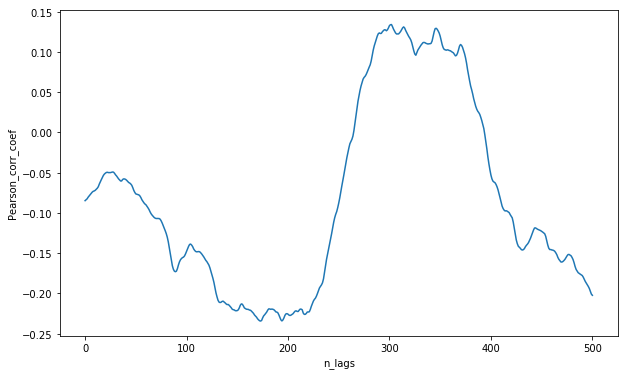

In [27]:
plt.figure(figsize=(10,6))
plt.plot(lag, coefficients)
plt.xlabel('n_lags')
plt.ylabel('Pearson_corr_coef')